# Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Info

In [5]:
from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/MyDrive/Tích hợp dữ liệu/data/final_.csv'

hotel_info = pd.read_csv(PATH)
hotel_info.columns

Mounted at /content/drive


Index(['name', 'img_url', 'city', 'address', 'url1', 'url2', 'url3', 'url4',
       'min_price', 'price1', 'price2', 'price3', 'price4', 'stars1', 'stars2',
       'stars3', 'stars4', 'description', 'number_review', 'nearby_places',
       'facilities', 'mean_rating', 'mean_stars', 'slug'],
      dtype='object')

In [7]:
cols = ['name', 'city', 'min_price', 'mean_stars', 'mean_rating', 'number_review', 'facilities']
hotels = hotel_info[cols]
hotels[hotels['mean_stars'] > 5]['mean_stars'] = 5
hotels.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3507,3508,3509,3510,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3541,3542,3543,3544,3545,3546
name,Khách sạn The Moon 2,Grand Hotel Saigon,The Myst Đồng Khởi,Quang Trung Hotel Go Vap,Khách sạn Majestic Sài Gòn,Cozrum Homes The Gallery Residence,Hotel Nikko Saigon,Khách Sạn Silverland Sakyo (Silverland Sakyo H...,Khách sạn Lotte Sài Gòn,Hôtel des Arts Saigon - MGallery Collection,Khách sạn Central Palace,Khách sạn Silverland Yen,Khách sạn La Vela Saigon,Khách sạn Mường Thanh Sài Gòn Centre (Muong Th...,Khách sạn Silverland Charner,Fusion Suites Saigon,Icon Saigon - Lifestyle Design Hotel,Cozrum Homes Premier Residence,Khách sạn Silverland Jolie,Khách sạn Liberty Central Saigon Citypoint,Maison De Camille Boutique Hotel,Khách sạn Âu Lạc Legend,Khách sạn Equatorial Ho Chi Minh City (Hotel E...,Winsuites Saigon,Khách sạn Saigon Charm,Khách sạn Oscar Sài Gòn,CityHouse-Sonata Residence,Ramana Saigon Hotel,Khách sạn Continental Sài Gòn,Khách sạn Palace Saigon,Hoa Phat Hotel & Apartment,Khách sạn New World Saigon,Cozrum Lux Hotel,CityHouse - CityOasis,The Art - Sunshine Apartment,INNSiDE by Melia Saigon Central,Khách sạn Sunshine Antique Saigon,Khách sạn Orchids Saigon,Khách sạn Hương Sen,The Reverie Saigon,...,Khách sạn Hilton Hà Nội,Hanoi Lotus Boutique Hotel,Khách sạn La Beaute De Hanoi,Hà Nội Oriental Pearl Hotel,Khách sạn Hanoi Discovery,Hanoi Boutique Hotel & Spa,Beryl Palace Hotel and Spa,Lavender Central Hotel & Spa,Estella Residence,Babylon Premium Hotel & Spa,Paragon Noi Bai Hotel and Pool,Hanoi Bella Rosa Suite Hotel & Spa,Emerald Hotel Hanoi,Hanoi Le Jardin Hotel & Spa,Family Hotel Sóc Sơn,Hanoi Airport Hotel - Convenient & Friendly,Khách sạn Westlake Tây Hồ,Khách sạn Rosarian,Dream Hotel & Apartment,THE PILGRIM HOTEL,Marriotte Hotel Hanoi,Golden Art Hotel,Babylon Garden Hotel & Spa,Viet Village Hotel & Travel,Chio Hotel & Apartment,Hotel du Parc Hanoi,Marigold Hotel Hanoi,Khách sạn Eclipse Legend,BridgeLakeside Hotel,Khách sạn Thăng Long Opera,Ritz Boutique Hotel,Khách sạn Hoa Đào,Hanoi De Maison Grand,Family Transit 2 Hotel,Khách sạn Box,Hanoi HM Boutique Hotel,Matilda Boutique and Spa Hotel,Hotel de l'Opera Hanoi - Mgallery,Anatole Hotel Hanoi,Khách sạn Hanoi Graceful
city,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,Hồ Chí Minh,...,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội,Hà Nội
min_price,982801,799999,1251702,272727,984621,355325,1369990,737504,1446195,1969716,626143,561287,1173580,899999,641748,904668,668477,388636,498701,1321286,599809,717098,873358,648626,125000,575384,416690,690458,899999,638961,311688,1474291,338081,763636,436363,908818,409091,865313,679481,5907000,...,1515999,1080520,433900,411778,322602,486438,396340,640365,389610,612483,600501,374910,237112,910429,486207,266377,578572,514781,955593,471921,181818,428830,771941,646587,507868,1610962,857891,257160,571006,474916,378827,617783,347488,189183,121212,245638,421917,1616006,724241,169827
mean_stars,3.5,5,5,2.5,5,3,5,4,5,5,4,4,5,4,4,4,4,3.5,4,4,3.5,4,5,4,2,3,3,4,4,4,3,5,3,2,3.5,4,4,4,3,5,...,4.5,3.5,3,3,2.5,4,4,3.5,2.5,3.5,3.5,3,3,4,2.5,3.5,3,3.5,3.5,3,3,3.5,4,3,NaN,4.5,3.5,3,2,4,3,3,3.5,2,3,3,4

In [8]:
hotels.describe().drop('count')

,min_price,mean_stars,mean_rating,number_review
mean,8.002679e+05,2.890696,6.734249,216.620806
std,1.310980e+06,0.854393,1.385615,603.545596
min,2.080400e+04,0.000000,2.000000,0.000000
25%,3.063025e+05,2.500000,6.000000,1.000000
50%,4.719210e+05,3.000000,6.800000,15.000000
75%,7.721710e+05,3.500000,7.500000,133.000000
max,1.987850e+07,5.000000,10.000000,8633.000000


# Check no-info values

In [9]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3547 non-null   object 
 1   city           3547 non-null   object 
 2   min_price      3547 non-null   int64  
 3   mean_stars     3536 non-null   float64
 4   mean_rating    2911 non-null   float64
 5   number_review  3547 non-null   int64  
 6   facilities     3547 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 194.1+ KB


In [10]:
na_percent = hotels.isna().sum() / hotels.count() * 100
na_percent

name              0.000000
city              0.000000
min_price         0.000000
mean_stars        0.311086
mean_rating      21.848162
number_review     0.000000
facilities        0.000000
dtype: float64

# Visualize some features

In [11]:
hotels['city'].unique()

array(['Hồ Chí Minh', 'Đà Lạt', 'Đà Nẵng', 'Nha Trang', 'Phú Quốc',
       'Quảng Ninh', 'Vũng Tàu', 'Hà Nội'], dtype=object)

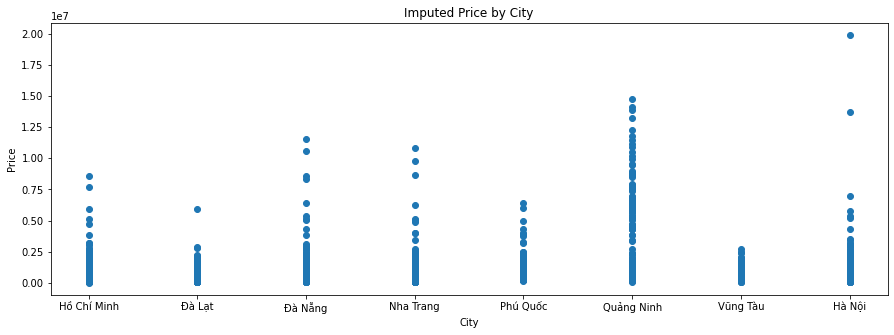

In [13]:
x = hotels['city']
y = hotels['min_price']
plt.figure(figsize=(15,5))
plt.title('Imputed Price by City')
plt.xlabel('City')
plt.ylabel('Price')
plt.scatter(x,y)
plt.show()

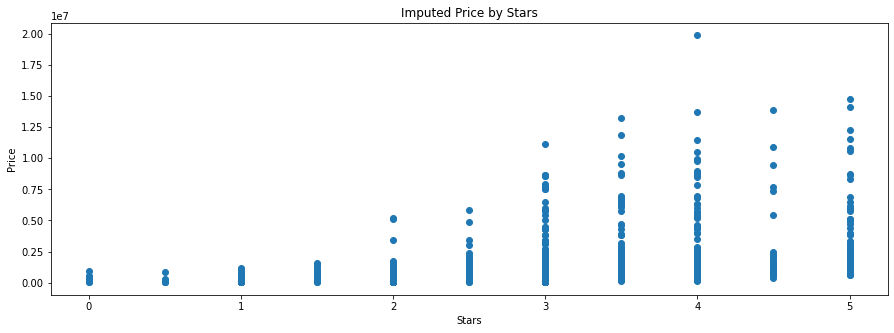

In [15]:
x = hotels['mean_stars']
y = hotels['min_price']
plt.figure(figsize=(15,5))
plt.title('Imputed Price by Stars')
plt.xlabel('Stars')
plt.ylabel('Price')
plt.scatter(x,y)
plt.show()

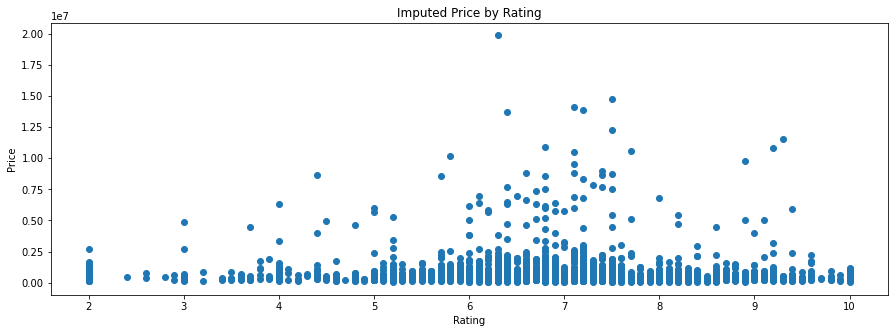

In [16]:
x = hotels['mean_rating']
y = hotels['min_price']
plt.figure(figsize=(15,5))
plt.title('Imputed Price by Rating')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.scatter(x,y)
plt.show()

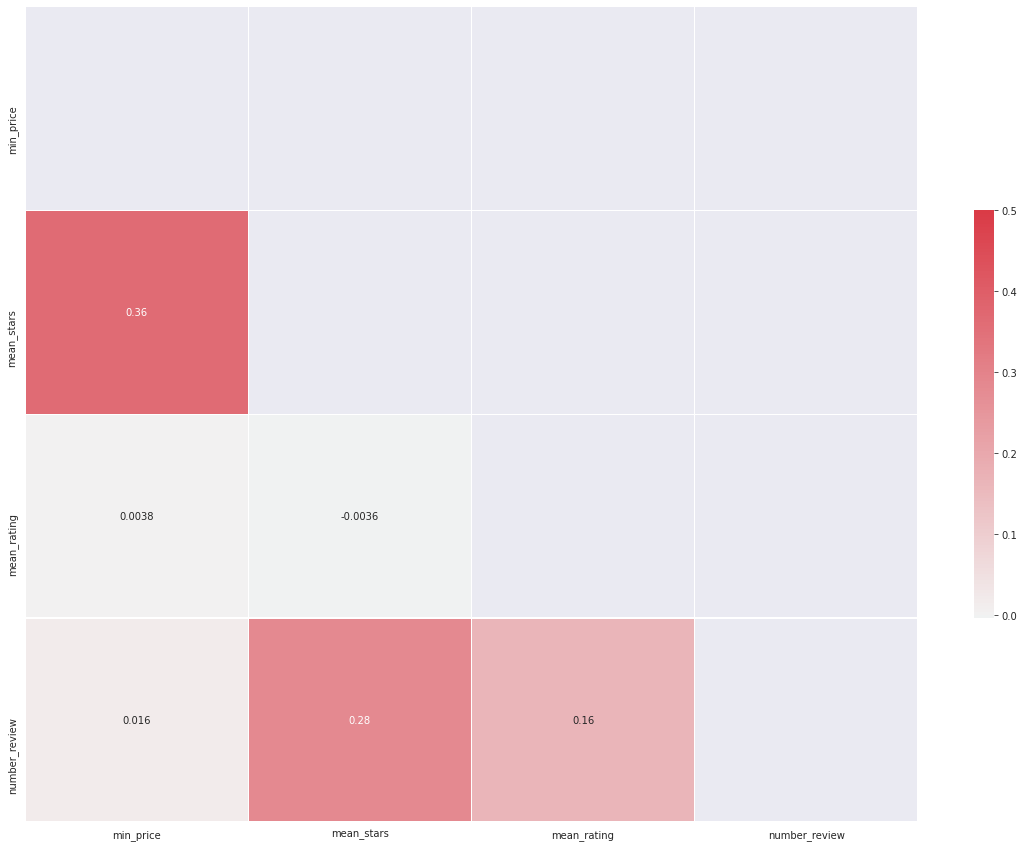

In [17]:
sns.set_style('dark')
corr = hotels.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

f,ax = plt.subplots(figsize=(20,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

fig = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, annot=True,
            linewidths=.2, cbar_kws={"shrink": .5})

# Handle missing values

# Some predictions